# Parametric maps
This notebook demonstrates how parametric maps can be made. In such parametric images, pixel intensity corresponds to  measurements of the objects, for example area.

In [1]:
import numpy as np
import pyclesperanto_prototype as cle
from skimage.io import imread, imsave
from skimage.measure import regionprops
from napari_simpleitk_image_processing import label_statistics

Starting point for drawing parametric maps is always a label image.

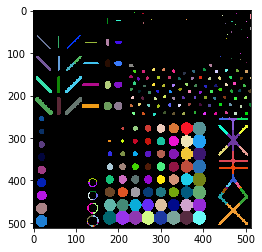

In [2]:
binary = cle.artificial_objects_2d()
labels = cle.voronoi_otsu_labeling(binary, spot_sigma=5)

cle.imshow(labels, labels=True)

## Pixel count map
The pixel count map derived from a label image expresses area or volume of objects in colour.

/Users/haase/code/pyclesperanto_prototype/pyclesperanto_prototype/_tier9/_statistics_of_labelled_pixels.py:283: RuntimeWarning: invalid value encountered in true_divide
  region_props['mean_max_distance_to_centroid_ratio'] = region_props['max_distance_to_centroid'] / region_props[
/Users/haase/code/pyclesperanto_prototype/pyclesperanto_prototype/_tier9/_statistics_of_labelled_pixels.py:285: RuntimeWarning: invalid value encountered in true_divide
  region_props['mean_max_distance_to_mass_center_ratio'] = region_props['max_distance_to_mass_center'] / region_props[


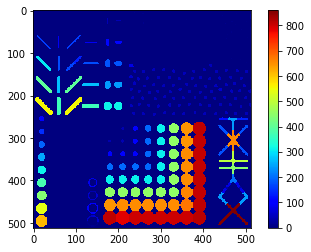

In [3]:
pixel_count_map = cle.label_pixel_count_map(labels)

cle.imshow(pixel_count_map, color_map='jet', colorbar=True)

## Extension ratio map
The extension ratio is a shape descriptor derived from the maximum distance of pixels to their object's centroid divided by the average distance of pixels to the centroid. It alllows to differentiate elongated from roundish objects.

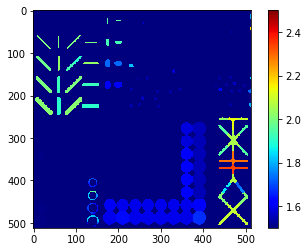

In [4]:
extension_ratio_map = cle.extension_ratio_map(labels)

cle.imshow(extension_ratio_map, 
           color_map='jet', 
           colorbar=True, 
           min_display_intensity=1.5, 
           max_display_intensity=2.5)

## Mean / minimum / maximum / standard-deviation intensity map
If we use additionally an intensity image, we can also produce parametric images showing intensity measurements.

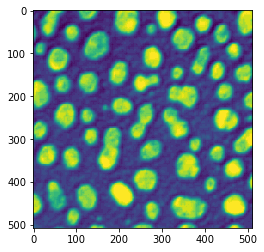

In [5]:
blobs = cle.scale(imread('../../data/blobs.tif'), factor_x=2, factor_y=2, auto_size=True)

cle.imshow(blobs)

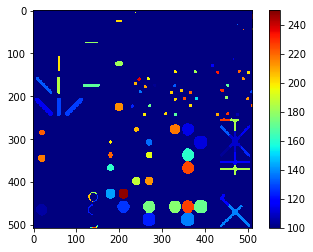

In [6]:
mean_intensity_map = cle.label_mean_intensity_map(blobs, labels)
cle.imshow(mean_intensity_map, 
           color_map='jet', 
           colorbar=True,
           min_display_intensity=100, 
           max_display_intensity=250)

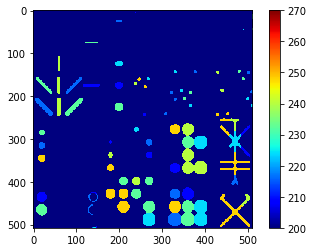

In [7]:
maximum_intensity_map = cle.maximum_intensity_map(blobs, labels)
cle.imshow(maximum_intensity_map, 
           color_map='jet', 
           colorbar=True, 
           min_display_intensity=200, 
           max_display_intensity=270)

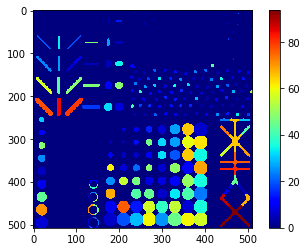

In [8]:
stddev_intensity_map = cle.standard_deviation_intensity_map(blobs, labels)
cle.imshow(stddev_intensity_map, color_map='jet', colorbar=True)

## Parametric maps using scikit-image
You can also compute your own measurement for each object and then visualize it in a parametric map image. Consider using [scikit-image's `regionprops()`](https://scikit-image.org/docs/dev/api/skimage.measure.html#skimage.measure.regionprops) for computing the measurements.

In [9]:
statistics = regionprops(cle.pull(labels))

### Aspect ratio map

In [10]:
# we're appending a [0] for the "measurement" of the background and attach all values behind
aspect_ratio = [0]

for s in statistics:
    if s.minor_axis_length:
        aspect_ratio.append(s.major_axis_length / s.minor_axis_length)
    else:
        aspect_ratio.append(0) # note: an aspect ratio of 0 is an "invalid" value

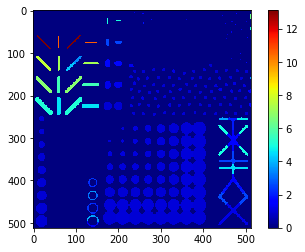

In [11]:
aspect_ratio_map = cle.replace_intensities(labels, aspect_ratio)

cle.imshow(aspect_ratio_map, colorbar=True, color_map="jet")

### Elongation map

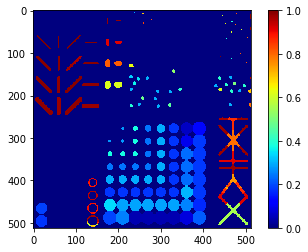

In [12]:
# we're appending a [0] for the "measurement" of the background and attach all values behind
eccentricity = [0] + [s.eccentricity for s in statistics]

eccentricity_map = cle.replace_intensities(labels, eccentricity)

cle.imshow(eccentricity_map, colorbar=True, color_map="jet")

## Extent map

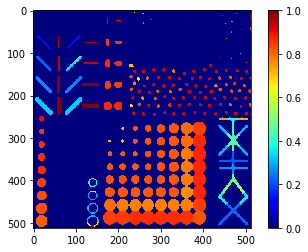

In [13]:
# we're appending a [0] for the "measurement" of the background and attach all values behind
extent = [0] + [s.extent for s in statistics]

extent_map = cle.replace_intensities(labels, extent)

cle.imshow(extent_map, colorbar=True, color_map="jet")

## Feret diameter map

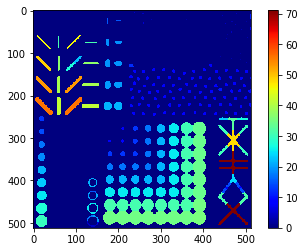

In [14]:
# we're appending a [0] for the "measurement" of the background and attach all values behind
feret_diameter = [0] + [s.feret_diameter_max for s in statistics]

feret_diameter_map = cle.replace_intensities(labels, feret_diameter)

cle.imshow(feret_diameter_map, colorbar=True, color_map="jet")

## Orientation map

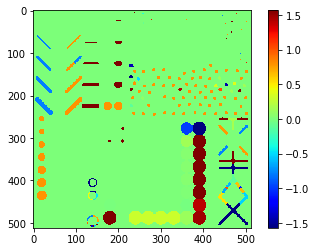

In [15]:
# we're appending a [0] for the "measurement" of the background and attach all values behind
orientation = [0] + [s.orientation for s in statistics]

orientation_map = cle.replace_intensities(labels, orientation)

cle.imshow(orientation_map, colorbar=True, color_map="jet")

## Perimeter map

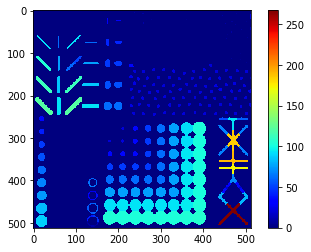

In [16]:
# we're appending a [0] for the "measurement" of the background and attach all values behind
perimeter_ski = [0] + [s.perimeter for s in statistics]

perimeter_ski_map = cle.replace_intensities(labels, perimeter_ski)

cle.imshow(perimeter_ski_map, colorbar=True, color_map="jet")

## Solidity map

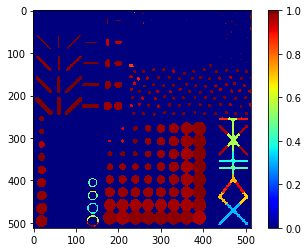

In [17]:
# we're appending a [0] for the "measurement" of the background and attach all values behind
solidity = [0] + [s.solidity for s in statistics]

solidity_map = cle.replace_intensities(labels, solidity)

cle.imshow(solidity_map, colorbar=True, color_map="jet")

## Parametric maps using SimpleITK-based measurements
Furthermore, also [SimpleITK](https://simpleitk.readthedocs.io/) comes with quantitative measurements for labeled images. For convenience reasons, we will use the scriptable napari plugin [napari-simpleitk-image-processing](https://github.com/haesleinhuepf/napari-simpleitk-image-processing) for deriving measurements.

In [18]:
statistics_sitk = label_statistics(labels, labels, size=True, shape=True, perimeter=True, intensity=False)

print(statistics_sitk.keys())

dict_keys(['label', 'elongation', 'feret_diameter', 'flatness', 'roundness', 'equivalent_ellipsoid_diameter_0', 'equivalent_ellipsoid_diameter_1', 'equivalent_spherical_perimeter', 'equivalent_spherical_radius', 'number_of_pixels', 'number_of_pixels_on_border', 'perimeter', 'perimeter_on_border', 'perimeter_on_border_ratio'])


## Elongation

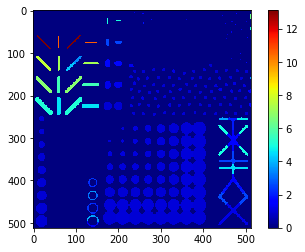

In [19]:
# we're appending a [0] for the "measurement" of the background and attach all values behind
elongation = [0] + statistics_sitk['elongation']

elongation_map = cle.replace_intensities(labels, elongation)

cle.imshow(elongation_map, colorbar=True, color_map="jet")

## Flatness

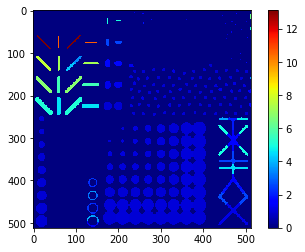

In [20]:
# we're appending a [0] for the "measurement" of the background and attach all values behind
flatness = [0] + statistics_sitk['flatness']

flatness_map = cle.replace_intensities(labels, flatness)

cle.imshow(flatness_map, colorbar=True, color_map="jet")

## Roundness

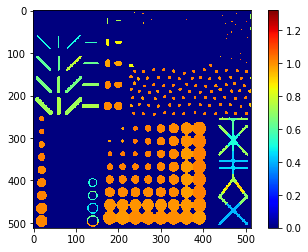

In [21]:
# we're appending a [0] for the "measurement" of the background and attach all values behind
roundness = [0] + statistics_sitk['roundness']

roundness_map = cle.replace_intensities(labels, roundness)

cle.imshow(roundness_map, colorbar=True, color_map="jet")

## Perimeter

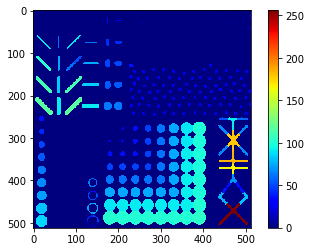

In [22]:
# we're appending a [0] for the "measurement" of the background and attach all values behind
perimeter_sitk = [0] + statistics_sitk['perimeter']

perimeter_sitk_map = cle.replace_intensities(labels, perimeter_sitk)

cle.imshow(perimeter_sitk_map, colorbar=True, color_map="jet")

## Quality assurance
If you generate a parametric image with the "label" column, the parametric image should actually be equal to the label input image.

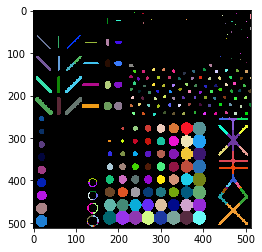

In [23]:
# we're appending a [0] for the "measurement" of the background and attach all values behind
label = [0] + statistics_sitk['label']

label_map = cle.replace_intensities(labels, label)

cle.imshow(label_map, labels=True)

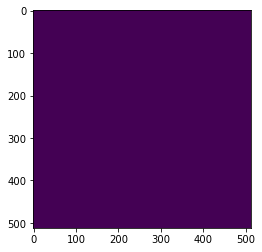

In [24]:
label_difference = labels - label_map

cle.imshow(label_difference)

In [25]:
label_difference.min(), label_difference.max()

(0.0, 0.0)

When comparing perimeter measurements from scikit-image and SimpleITK, we could see small differences. Here we can visualize which objects are affected and to what degree.

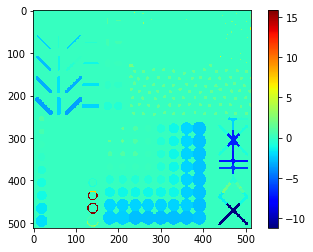

In [26]:
perimeter_difference = perimeter_sitk_map - perimeter_ski_map

cle.imshow(perimeter_difference, colorbar=True, color_map="jet")